## Intro


We have already determined the best batch size for the problem.
What we want to do now is experiment with different model architectures to find the best one.

With that goal in mind, we have written a couple utils functions that are going to help us
evaluate the performance of the different models:

- fit_and_save_model:
  Given a model, a training and a validation set,
  train the model, save it an return the training history
- visualize_performance:
  Given a model, its history and the validation set,
  visualize its performance with a confusion matrix and a line plot of the accuracy vs num epochs.

If we import those, we can combine them in a single function
that allows us to fit an evaluate the performance of a model in a single line of code.
This is going to be very helpful for this notebooks


In [6]:
from model_evaluation import fit_and_save_model, visualize_performance


def try_model(model, model_name, x_train, y_train, x_validate, y_validate, **kwargs):
    history = fit_and_save_model(
        model, model_name, x_train, y_train, x_validate, y_validate, **kwargs
    )
    visualize_performance(history, model_name, x_validate, y_validate)

Also we have to make a few imports and load the dataset.


In [11]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from preprocessing import get_train_test_sets

x_train, x_validate, _, y_train, y_validate, _ = get_train_test_sets()

warnings.filterwarnings("ignore")
IMAGE_SHAPE = (28, 28, 1)

The rest of the notebook is going to be dedicated to trying out many different architectures and
evaluating their performance.


## Trying many different architectures


### 1 convolution layer, 1 dense layer


The first model that we'll try is the simple model used in the batch size notebook.


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


Final accuracy:  0.9132
Final validation accuracy:  0.8987


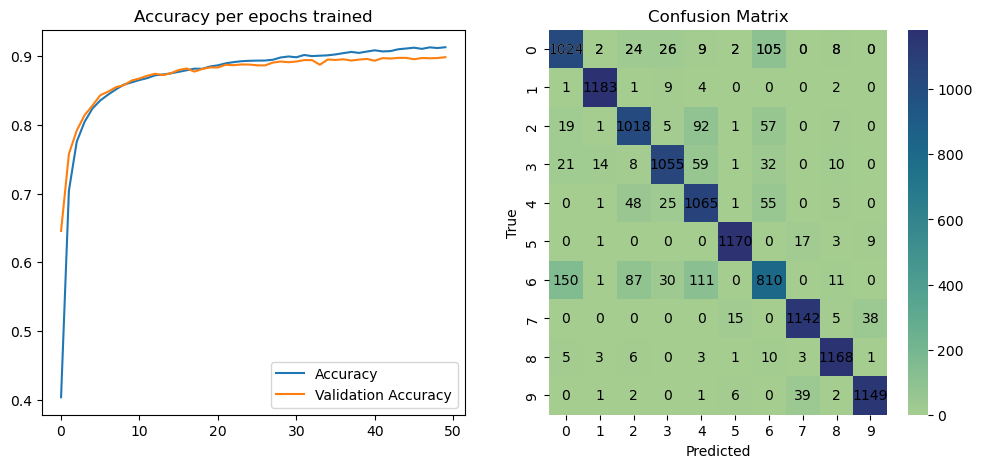

In [14]:
# Define model architecture
model_1 = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(model_1, "1conv1dense", x_train, y_train, x_validate, y_validate)

The curve on the left indicates that the model suffers from overfitting.
A good way to fix this is to add a dropout layer.
This kind of layers receive the input from a previous layer and they output that plus some added noise,
which helps to avoid overfitting.


### 1 convolution layer, 1 dense layer, with Dropout


#### 32 filters


2024-05-25 16:48:41.868697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 16:48:41.983906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ../models/1conv1denseDO.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1denseDO.model/assets


Final accuracy:  0.9074
Final validation accuracy:  0.9024


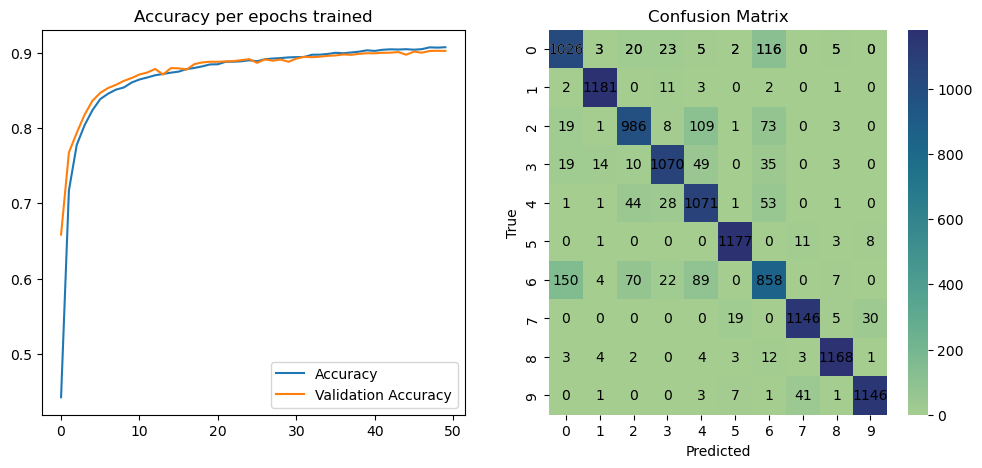

In [15]:
# Define model architecture
model_2 = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(model_2, "1conv1denseDO", x_train, y_train, x_validate, y_validate)

As you can see on the left figure, the dropout layer did its job and the overfitting problem
is almost completely gone.
From now on we'll use a dropout layer between every adjacent hidden layer in all the new models


#### 16 filters


2024-05-25 16:55:10.734286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,16]
	 [[{{node inputs}}]]
2024-05-25 16:55:10.844629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,16]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ../models/1conv1denseDO.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1denseDO.model/assets


Final accuracy:  0.9005
Final validation accuracy:  0.9028


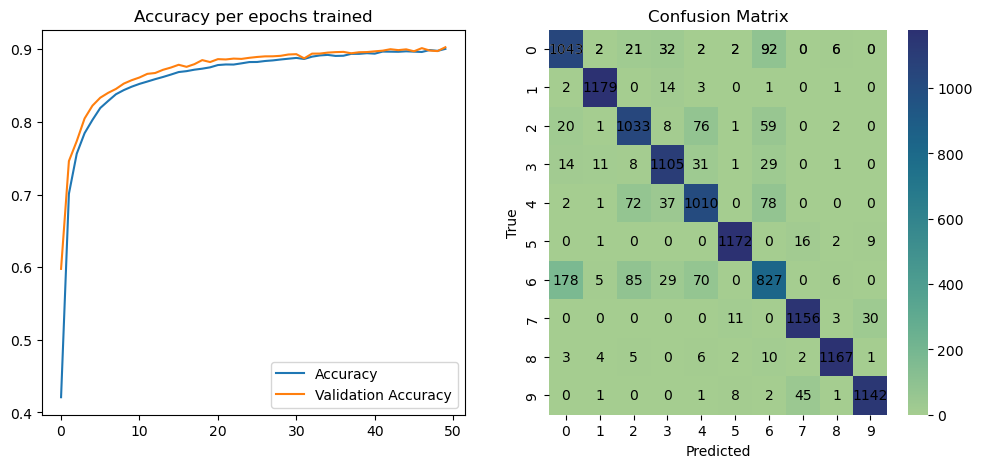

In [17]:
# Define model architecture
model_2 = Sequential(
    [
        Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(model_2, "1conv1denseDO", x_train, y_train, x_validate, y_validate)

The final validation accuracy is good, but it's an outlier if you look at the ones from previous epochs.
Taking that into account, this model performs worse than the last one.


### 1 convolution layer, 2 dense layer, with Dropout


2024-05-25 18:04:50.670982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 18:04:50.765638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


Final accuracy:  0.9093
Final validation accuracy:  0.9033


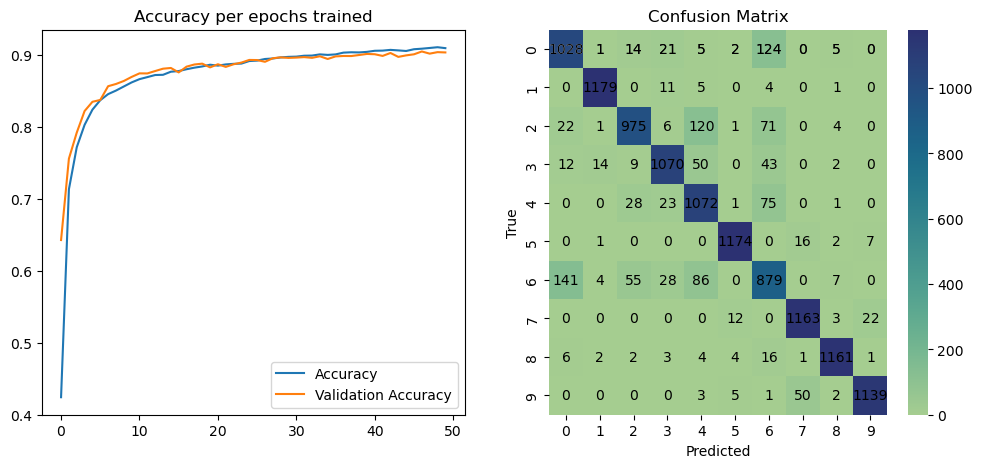

In [9]:
# Define model architecture
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(48, activation="relu"),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(model, "1conv2dense", x_train, y_train, x_validate, y_validate)

This isn't a bad performance, but it doesn't look like adding the second dense layer
resulted in any improvements. If anything, it made it slightly worse.


### 2 convolution layer, 1 dense layer, with Dropout


#### 8, 16 filters


2024-05-25 16:58:37.269929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,8]
	 [[{{node inputs}}]]
2024-05-25 16:58:37.280346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,16]
	 [[{{node inputs}}]]
2024-05-25 16:58:37.412000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,8]
	 [[{{node inputs}}]]
2024-

INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


Final accuracy:  0.8409
Final validation accuracy:  0.8586


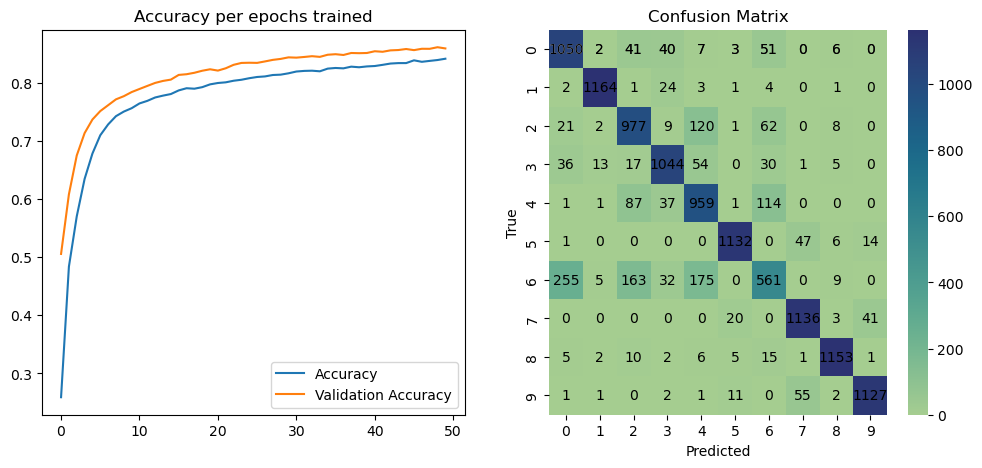

In [18]:
# Define model architecture
model_3 = Sequential(
    [
        Conv2D(filters=8, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Conv2D(filters=16, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(model_3, "2conv1dense_8_16", x_train, y_train, x_validate, y_validate)

This is straight up a bad performance when compared to the previous models.


#### 32, 64 filters


2024-05-25 17:46:32.225498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 17:46:32.233641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2024-05-25 17:46:32.358702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


Final accuracy:  0.9057
Final validation accuracy:  0.9016


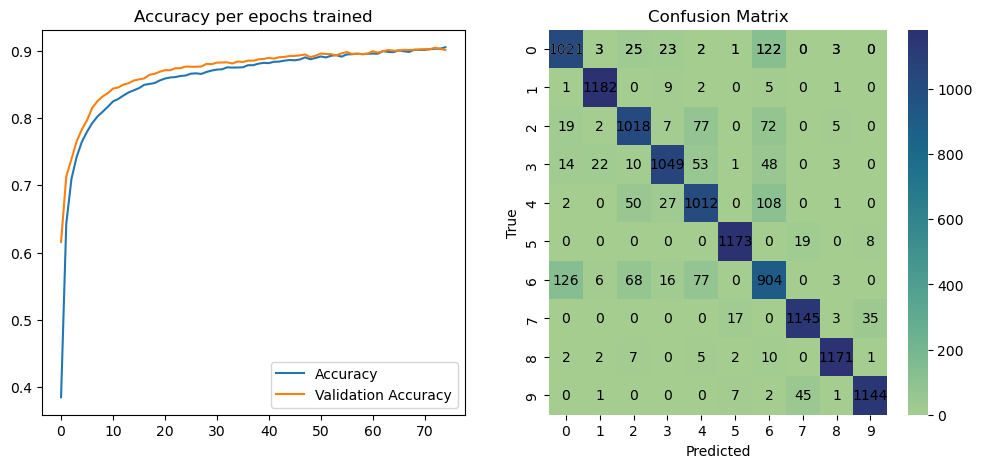

In [7]:
# Define model architecture
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(
    model, "2conv1dense_32_64", x_train, y_train, x_validate, y_validate, num_epochs=75
)

Even though we added a few epochs to compensate for the higher number of parameters,
this model performs slightly worse than the ones with 1 convolution layer.


### 2 convolution layer, 2 dense layer, with Dropout


#### 128, 64 neurons


2024-05-25 18:01:06.290839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 18:01:06.298653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2024-05-25 18:01:06.408335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


Final accuracy:  0.9127
Final validation accuracy:  0.9065


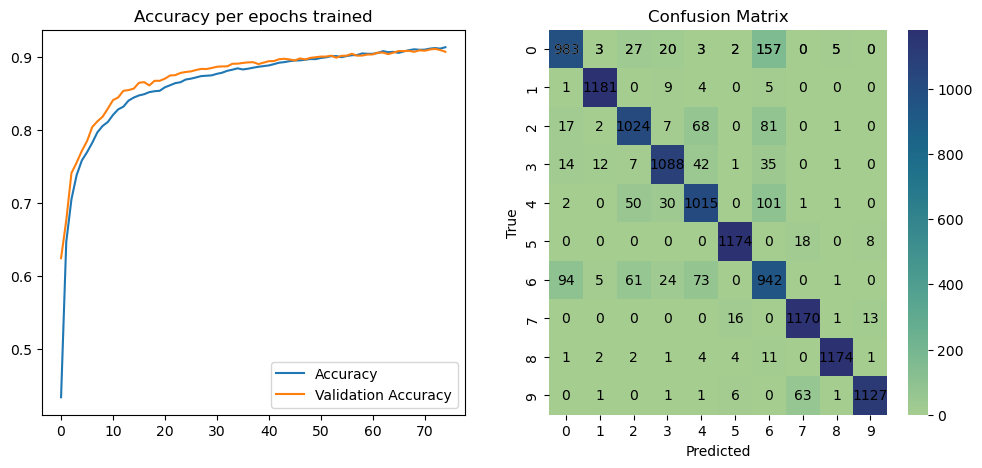

In [8]:
# Define model architecture
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(
    model, "2conv2dense_128_64", x_train, y_train, x_validate, y_validate, num_epochs=75
)

This is the best performance so far, but we have to take into account that we only trained
the 1 layer model for 50 epochs


#### 64, 32 neurons


2024-05-25 18:14:09.029987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 18:14:09.041719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2024-05-25 18:14:09.159414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


INFO:tensorflow:Assets written to: ../models/1conv1dense.model/assets


Final accuracy:  0.902
Final validation accuracy:  0.9032


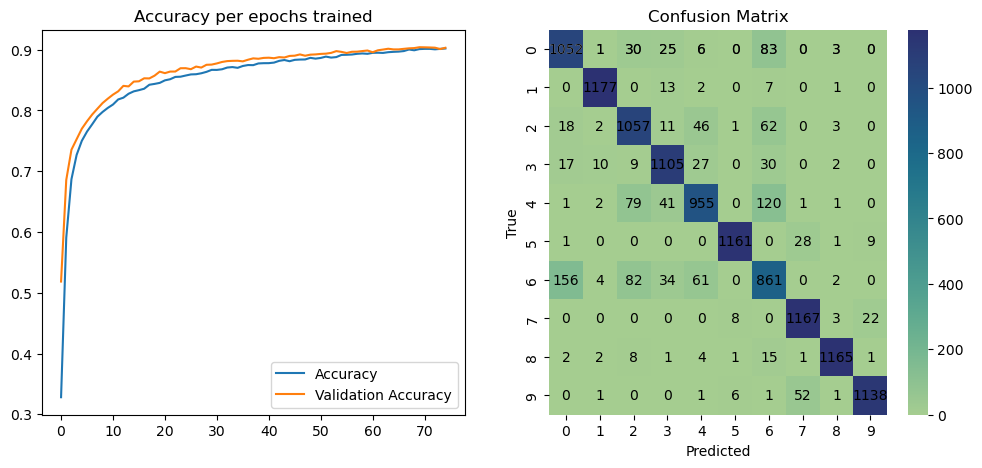

In [10]:
# Define model architecture
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(
    model, "2conv2dense_64_32", x_train, y_train, x_validate, y_validate, num_epochs=75
)

Not great when compared to other models


## Final 2 candidates


We are going to test the 2 best performers for 100 epochs


2024-05-25 18:48:17.821441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 18:48:17.912473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ../models/candidate_1.model/assets


INFO:tensorflow:Assets written to: ../models/candidate_1.model/assets


Final accuracy:  0.9246
Final validation accuracy:  0.9115


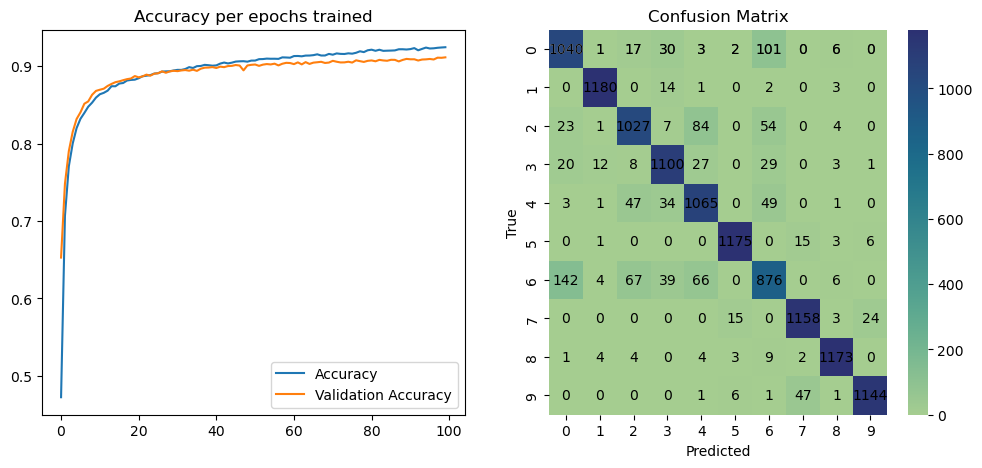

In [14]:
# Define model architecture
candidate_1 = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(
    candidate_1, "candidate_1", x_train, y_train, x_validate, y_validate, num_epochs=100
)

2024-05-25 19:07:23.740804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2024-05-25 19:07:23.750677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2024-05-25 19:07:24.084066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: ../models/candidate_2.model/assets


INFO:tensorflow:Assets written to: ../models/candidate_2.model/assets


Final accuracy:  0.9211
Final validation accuracy:  0.9128


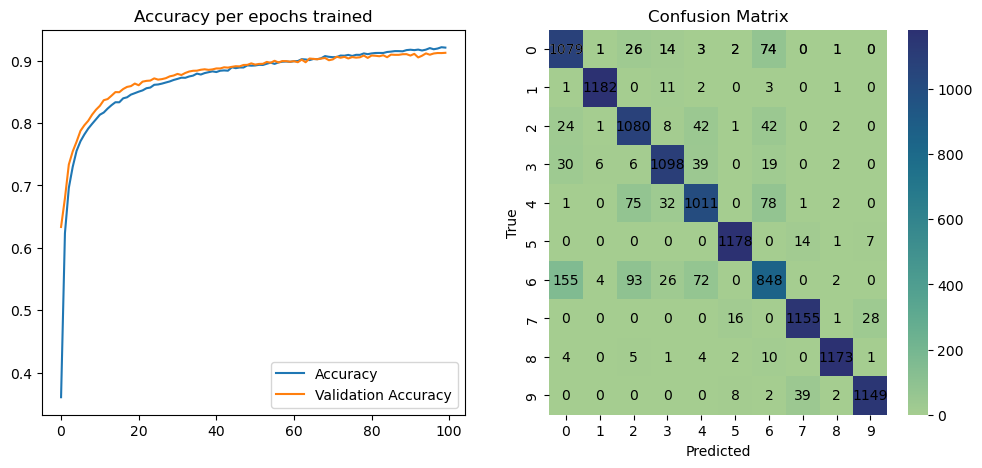

In [15]:
# Define model architecture
candidate_2 = Sequential(
    [
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=IMAGE_SHAPE),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

try_model(
    candidate_2, "candidate_2", x_train, y_train, x_validate, y_validate, num_epochs=100
)

There's not a big difference by any standard, but the second one is slightly more accurate.
Therefore that is the one that we'll use.


...
